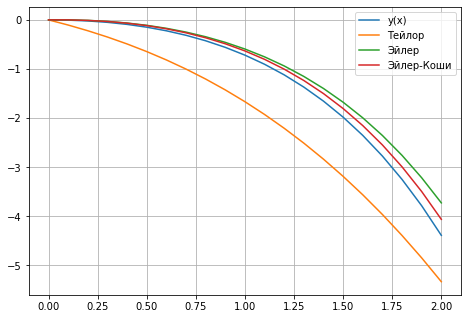

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sympy import *

x, y = symbols('x y')

def ode_teylor(f, x0, y0, n, h, max_diff = 4):
    dy = [diff(f, x)]
    for k in range(1, max_diff):
        dy.append(diff(dy[k - 1], x))
    return y0 + sum([(h ** i) * dy[i].subs(x, x0) / np.math.factorial(i) for i in range(1, max_diff)])

def ode_euler(f, xs, x0, y0, n, h):
    ys = [y0]
    for i in range(n):
        ys.append(ys[i] + h * f.subs({x: xs[i], y: ys[i]}))
    return ys

def ode_euler_cauchy(f, xs, x0, y0, n, h):
    ys = [y0]
    for i in range(n):
        fs = f.subs({x: xs[i], y: ys[i]})
        ys.append(ys[i] + h * (fs + f.subs({x: xs[i], y: ys[i] + h * fs})) / 2)
    return ys

a, b = 0, 2
n = 20
h = (b - a) / n
xs = [a + i * h for i in range(n + 1)]
x0 = 0
y0 = 0

f = y - x
res = x + 1 - exp(x)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(xs, list(map(lambda xi: res.subs(x, xi), xs)), label='y(x)')
ax.plot(xs, list(map( lambda xi: ode_teylor(res, x0, y0, n, xi), xs)), label='Тейлор')
ax.plot(xs, ode_euler(f, xs, x0, y0, n, h), label='Эйлер')
ax.plot(xs, ode_euler_cauchy(f, xs, x0, y0, n, h), label='Эйлер-Коши')
ax.legend()
plt.grid()
plt.show()